<a href="https://colab.research.google.com/github/Stepanishcheva/dataAnalysis/blob/main/%D0%B7%D0%B0%D1%87%D0%B5%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача мультиклассовой классификации данных
Предварительная обработка данных, обучение и оценка модели.

Эти данные были первоначально собраны 1986-87 годах Дж.П. Зибертом. Тогда задача состояла в том, чтобы найти метод различия 3D-объектов в 2D-изображении путем применения ансамбля  признаков формы к 2D-силуэтам объектов. Показатели особенностей формы, извлеченные из примеров силуэтов объектов, подлежащих различию, были использованы для создания дерева правил классификации.



 **Сбор данных**

Признаки и их значения были извлечены из силуэтов с помощью расширения BINATTS HIPS (Иерархическая система обработки изображений), которое извлекает комбинацию функций, не зависящих от масштаба, с использованием как классических показателей, основанных на моментах, таких как масштабная дисперсия, асимметрия и эксцесс относительно главных/второстепенных осей, так и эвристических показателей, таких как впадины, округлость, прямоугольность и компактность.


 Для эксперимента использовались четыре автомобиля: **двухэтажный автобус, фургон Cheverolet, Saab 9000 и Opel Manta 400**. Эта конкретная комбинация транспортных средств была выбрана с расчетом на то, что автобус, фургон и любой из автомобилей будут легко различимы, но различить автомобили будет сложнее.

* Изображения были получены камерой, смотрящей вниз на модель 
транспортного средства с фиксированным углом возвышения. 
* Транспортные средства были размещены на поверхности с рассеянной подсветкой. Автомобили были выкрашены в матово-черный цвет, чтобы свести к минимуму блики. 
* Все изображения были сняты с пространственным разрешением 128x128 пикселей. 
* Транспортные средства поворачивались, и их угол ориентации измерялся с помощью радиальной решетки под транспортным средством. 0 и 180 градусов соответствовали видам "в лоб" и "сзади" соответственно, в то время как 90 и 270 соответствовали профилям в противоположных направлениях. 
* Для каждого транспортного средства было сделано два набора из 60 изображений, каждый из которых охватывал полный поворот на 360 градусов. Транспортное средство было повернуто на фиксированный угол между изображениями.Еще два набора изображений  были сняты камерой на высотах 37,5° и 30,8° соответственно. Эти наборы также содержат 60 изображений на транспортное средство, кроме одного набора, который содержит только 46 из-за сложности размещения фургона на изображении при некоторых положениях.

### 1. Чтение данных
Мы будем работать с [набором данных](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), описывающим различные автомобили для задачи мультиклассовой классификации ($k=4$). С данными можно ознакомиться ниже:

* COMPACTNESS (average perim)**2/area 
* CIRCULARITY (average radius)**2/area 
* DISTANCE CIRCULARITY area/(av.distance from border)**2 
* RADIUS RATIO (max.rad-min.rad)/av.radius 
* PR.AXIS ASPECT RATIO (minor axis)/(major axis) 
* MAX.LENGTH ASPECT RATIO (length perp. max length)/(max length) 
* SCATTER RATIO (inertia about minor axis)/(inertia about major axis) 
* ELONGATEDNESS area/(shrink width)**2 
* PR.AXIS RECTANGULARITY area/(pr.axis length*pr.axis width) 
* MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this) 
* SCALED VARIANCE (2nd order moment about minor axis)/area 
* SCALED VARIANCE (2nd order moment about major axis)/area 
* SCALED RADIUS OF GYRATION (mavar+mivar)/area 
* SKEWNESS ABOUT (3rd order moment about major axis)/sigma_min**3 
* SKEWNESS ABOUT (3rd order moment about minor axis)/sigma_maj**3 
* KURTOSIS ABOUT (4th order moment about major axis)/sigma_min**4 
* KURTOSIS ABOUT (4th order moment about minor axis)/sigma_maj**4 
* HOLLOWS RATIO (area of hollows)/(area of bounding polygon) 

In [1]:
RANDOM_STATE = 2021

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(
    data, target, 
    test_size=0.35, random_state=RANDOM_STATE
)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Чтобы получить некоторое представление о наборе данных, можно использовать `pandas`. Часть `train` ниже преобразуется в `pd.DataFrame` .

In [6]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,805,81,43,68,148,64,7,150,45,19,144,175,330,171,80,1,2,182,185
1,636,96,41,69,153,56,7,141,47,18,141,162,297,169,61,11,8,202,209
2,786,107,55,103,213,68,11,219,30,25,172,221,709,216,70,10,7,187,197
3,781,88,42,64,151,62,8,130,51,18,142,150,253,161,63,3,2,203,210
4,343,102,54,101,190,58,10,222,30,25,171,224,728,203,71,13,6,189,198
5,258,99,48,104,196,63,10,201,33,23,152,221,604,199,73,8,4,188,197
6,86,89,41,84,141,58,9,149,45,19,145,172,330,162,72,4,18,188,200
7,11,90,34,66,136,55,6,123,54,17,118,148,224,118,65,5,26,196,202
8,540,92,45,74,187,74,7,157,41,19,143,179,375,183,70,8,6,195,201
9,24,99,53,105,219,66,11,204,32,23,165,221,623,224,68,0,6,191,201


Методы `describe` и `info` предоставляют некоторую полезную информацию.

In [7]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,422.961749,94.080146,45.153005,82.808743,170.919854,62.087432,8.732240,170.475410,40.510018,20.699454,148.664845,190.078324,448.666667,175.943534,72.225865,6.435337,12.415301,189.198543,196.105647
std,244.044914,8.511529,6.200593,15.757336,32.830534,8.381615,5.088924,33.640948,7.765636,2.639333,14.587036,31.663307,179.382731,32.945023,7.610499,5.002363,9.017553,6.158396,7.319092
min,0.000000,77.000000,33.000000,40.000000,110.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,214.000000,88.000000,40.000000,70.000000,143.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,321.000000,151.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,415.000000,93.000000,45.000000,80.000000,169.000000,62.000000,8.000000,158.000000,43.000000,20.000000,147.000000,179.000000,367.000000,174.000000,72.000000,5.000000,11.000000,189.000000,197.000000
75%,636.000000,100.000000,50.000000,98.000000,197.000000,66.000000,10.000000,202.000000,46.000000,23.000000,161.000000,219.000000,611.000000,200.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,262.000000,61.000000,28.000000,186.000000,320.000000,998.000000,264.000000,135.000000,22.000000,39.000000,206.000000,211.000000


In [8]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Здесь мы выполним преобразования для обучения модели и оценки качества. После каждого задания будем кратко объяснять свои результаты.

###### 1.0. Исследовательский анализ данных

Давайте взглянем на распределение целевой переменной в наборе данных.

In [9]:
import warnings
warnings.filterwarnings("ignore")

from tqdm.notebook import tqdm

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
def plot_target_train_test_distribution(fig, data, data_categories, colors):
    """
    This figure illustrates the distribution 
    of the target variable in the train and test
    -------------------------------------------------------------------------
    @param fig — matplotlib figure
    @param data — dict(str, list(str)) — data to plot
    @param data_categories — list(str) — categories to plot
    @param colors — dict(str, str) — colors for each category
    -------------------------------------------------------------------------
    """
    sns.set(style="darkgrid", font_scale=1.3)
    sns.set_style({"font.family": "serif"})

    plt.title("Target distribution", fontsize=25, pad=10)
    plt.xlabel("classes", fontsize=22, labelpad=10)
    plt.ylabel("number of values", fontsize=22, labelpad=10)

    for sample_type in data_categories:
        plt.hist(data[sample_type], 
                 alpha=0.75,
                 color=colors[sample_type], 
                 edgecolor="black", 
                 label=sample_type, lw=1)
        
    legend = plt.legend(framealpha=1)
    frame = legend.get_frame()
    frame.set_facecolor("white")
    frame.set_edgecolor("black")
    
    plt.show()

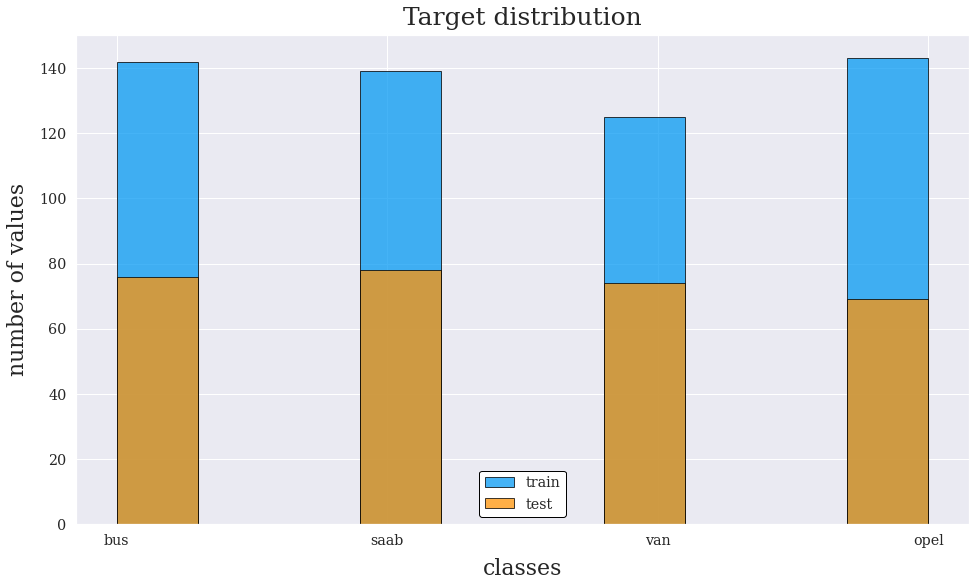

In [11]:
fig = plt.figure(figsize=(16, 9))

plot_target_train_test_distribution(
    fig,
    data={"train": y_train, 
          "test": y_test},
    data_categories=["train", "test"],
    colors={"train": "xkcd:azure", 
            "test": "xkcd:tangerine"}
)

Здесь мы можем увидеть, что распределение данных в целевой переменной сбалансировано

#### 1.1. Basic logistic regression
* Найдем оптимальные гиперпараметры для логистической регрессии с использованием кросс-валидации на `train`.

* Оценим качество модели с помощью метрик `f1` и `accuracy`.
* Построим ROC-кривую для обученной модели. Для многоклассовой классификации используем библиотеку `scikitplot` (напр. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Используем следующие гиперпараметры для логистической регрессии: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

Протестируем разные значения гиперпараметра `C` (*inverse of regularization strength*) и выберем лучший по метрике `f1_macro` (*macro-averaged*). 

* Описание гиперпараметров LogisticRegression можно увидеть [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression). 
* [Метрики качества](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) в sklearn.

Напишем функцию, которая иллюстрирует поиск оптимального гиперпараметра модели по сетке с использованием кросс-валидации.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [13]:
def search_and_draw(X, y, model, parameters, param_scale='ordinary', draw=True):    
    """
    Finds the optimal hyperparameter of the model on the grid 
    and visualizes the results.
    """
    cv_model = GridSearchCV(estimator=model, param_grid=parameters, 
                            scoring="f1_macro", cv=4, n_jobs=-1, verbose=10)
    cv_model.fit(X, y)
    
    if draw:
        means = cv_model.cv_results_['mean_test_score']
        error = cv_model.cv_results_['std_test_score']

        sns.set(style="darkgrid", font_scale=1.3)
        sns.set_style({"font.family": "serif"})

        for param_name, grid in parameters.items():
            plt.figure(figsize=(12, 8))
            plt.title('Choose ' + param_name, fontsize=25, pad=10)

            if (param_scale == 'log'): plt.xscale('log')

            plt.xlabel('Parameter', fontsize=22, labelpad=10)
            plt.ylabel('F1-macro', fontsize=22, labelpad=10)
            
            plt.plot(grid, means, label='Mean values of score', color='red', lw=3)
            plt.fill_between(grid, means - error, means + error, 
                             color='green', label='Filled area between errors', alpha=0.5)
            
            plt.show()
        
    return cv_model.best_params_

In [14]:
model = LogisticRegression(
    multi_class='multinomial', 
    solver='saga',
    tol=1e-3,
    random_state=RANDOM_STATE
)
parameters = {
    "C": [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3]
}

Fitting 4 folds for each of 8 candidates, totalling 32 fits


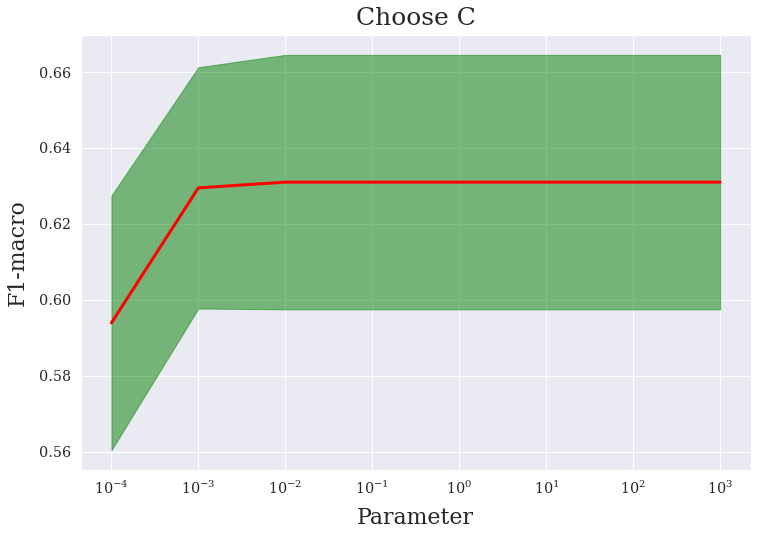

Best params: {'C': 0.01}


In [15]:
best_params = search_and_draw(X_train, y_train, 
                              model, parameters, 
                              param_scale="log")

print(f"Best params: {best_params}")

Посмотрим, изменится ли качество предсказания после нормировки признаков.

In [16]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

`StandardScaler` выполняет преобразование $$z = \frac{x - \mu}{\sigma}, \text{где $\sigma$ - стандартное отклонение, а  $\mu$ - среднее}$$

Fitting 4 folds for each of 8 candidates, totalling 32 fits


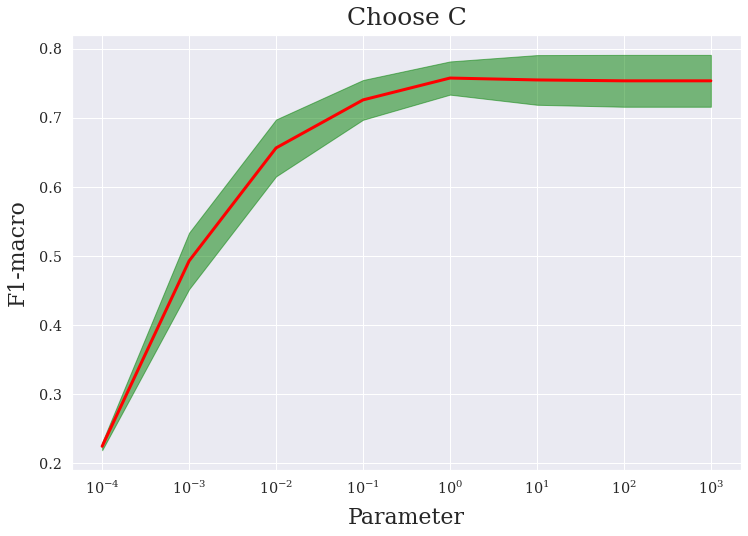

Best params: {'C': 1}


In [17]:
best_params = search_and_draw(X_train_scaled, y_train, 
                              model, parameters, 
                              param_scale="log")

print(f"Best params: {best_params}")

Видим, что со `StandardScaler` метрика `f1_macro` возросла почти до 0.8. Вычислим итоговое качество на *train* и *test* уже на нормированных данных.

In [18]:
model = LogisticRegression(
    multi_class='multinomial', 
    solver='saga',
    tol=1e-3,
    C=best_params["C"],
    random_state=RANDOM_STATE
)

model.fit(X_train_scaled, y_train)
y_train_predicted = model.predict(X_train_scaled)
y_test_predicted = model.predict(X_test_scaled)

In [19]:
from sklearn.metrics import f1_score, accuracy_score


def calculate_metrics(y_train, y_train_predicted, y_test, y_test_predicted):
    metics_pd = pd.DataFrame({
        "accuracy": [accuracy_score(y_train, y_train_predicted), 
                     accuracy_score(y_test, y_test_predicted)],
    }, index=["train", "test"])

    # for average in ['macro', 'micro', 'weighted']:
    for average in ['macro']:
        metics_pd[f"f1-{average}"] = [
            f1_score(y_train, y_train_predicted, average=average),
            f1_score(y_test, y_test_predicted, average=average)
        ]

    return metics_pd

In [20]:
calculate_metrics(y_train, y_train_predicted, y_test, y_test_predicted)

,accuracy,f1-macro
train,0.797814,0.796756
test,0.801347,0.795645


In [21]:
! pip install scikit-plot

[scikitplot::metrics](https://scikit-plot.readthedocs.io/en/stable/metrics.html)

In [22]:
import scikitplot as skplt


def plot_roc_curves(y_true, y_predicted):
    skplt.metrics.plot_roc(y_true, y_predicted, figsize=(12, 8))
    plt.title("ROC-curves for the trained model (multiclass case)", fontsize=24, pad=10)
    plt.xlabel("False Positive Rate", fontsize=18, labelpad=10)
    plt.ylabel("True Positive Rate", fontsize=18, labelpad=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

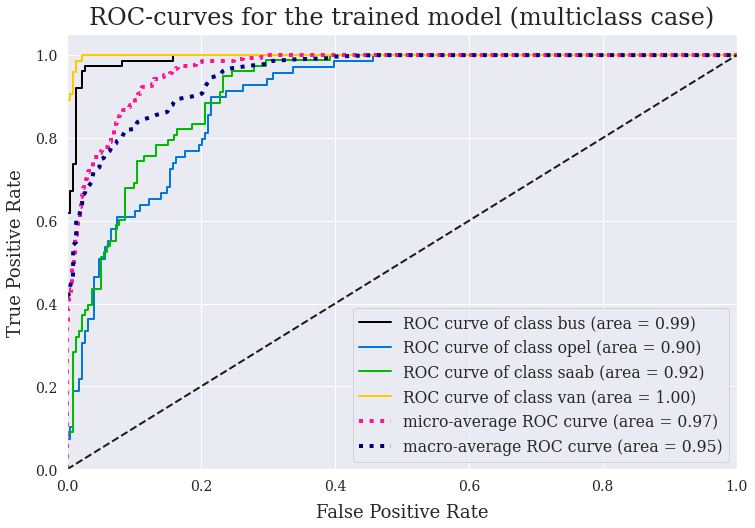

In [23]:
plot_roc_curves(y_test, model.predict_proba(X_test_scaled))

#### 1.2. PCA: explained variance plot
* Примением к данным PCA. 
* Построим график объясненной дисперсии (explained variance plot).

In [24]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=X_train_scaled.shape[1], random_state=RANDOM_STATE)

In [27]:
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

**Explaided variance.**

The explained variance tells how much information (variance) can be attributed to each of the principal components. By using the attribute `explained_variance_ratio_`, you can see that the first principal component contains $x$% of the variance and the second principal component contains $y$% of the variance. Together, the two components contain $(x+y)$% of the information.

[source](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

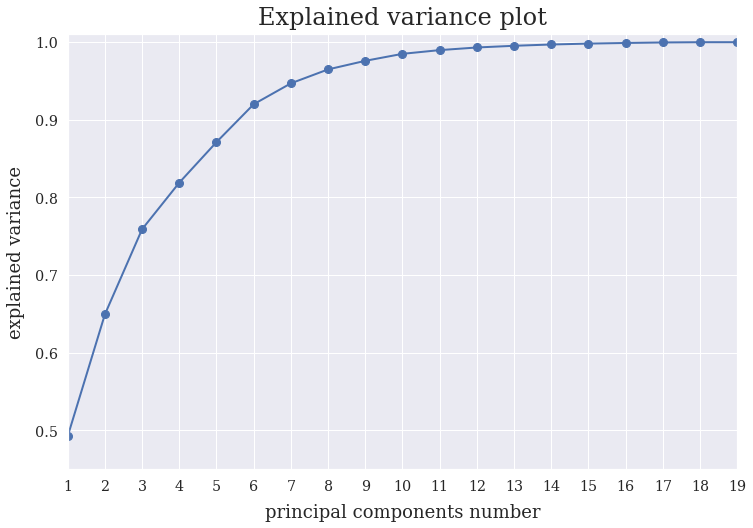

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(
    np.arange(1, pca.n_components_ + 1),
    np.cumsum(pca.explained_variance_ratio_),
    marker='o', linestyle='-', linewidth=2, markersize=8
)
plt.title("Explained variance plot", fontsize=24, pad=10)
plt.xlabel("principal components number", fontsize=18, labelpad=10)
plt.ylabel("explained variance", fontsize=18, labelpad=10)
plt.xlim((1, pca.n_components))
plt.ylim((0.45, 1.01))
plt.xticks(np.arange(1, pca.n_components_ + 1))
plt.show()

In [29]:
print(list(map(
    lambda x: 100 * round(x, 3), 
    pca.explained_variance_ratio_    
)))

[49.3, 15.7, 11.0, 6.0, 5.2, 4.9, 2.7, 1.7999999999999998, 1.0999999999999999, 0.8999999999999999, 0.5, 0.3, 0.2, 0.2, 0.1, 0.1, 0.1, 0.0, 0.0]


#### 1.3. PCA trasformation

* Выберем соответствующее количество компонентов. Ответим на вопрос, следует ли нормализовать данные.

PCA чувствителен к масштабу признаков, поэтому перед применением PCA признаки отмасштабированы с помощью `StandardScaler`.

Примем `n_components=10`, так как остальные компоненты содержат менее 0.89% информации о данных.

In [30]:
PCA_N_COMPONENTS = 10
pca = PCA(n_components=PCA_N_COMPONENTS, random_state=RANDOM_STATE)

In [31]:
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 1.4. Logistic regression on PCA-preprocessed data.
Проведем ту же работу, что в части 2.1 для данных с применным PCA.

In [32]:
model = LogisticRegression(
    multi_class='multinomial', 
    solver='saga',
    tol=1e-3,
    random_state=RANDOM_STATE
)
parameters = {
    "C": [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3]
}

Fitting 4 folds for each of 8 candidates, totalling 32 fits


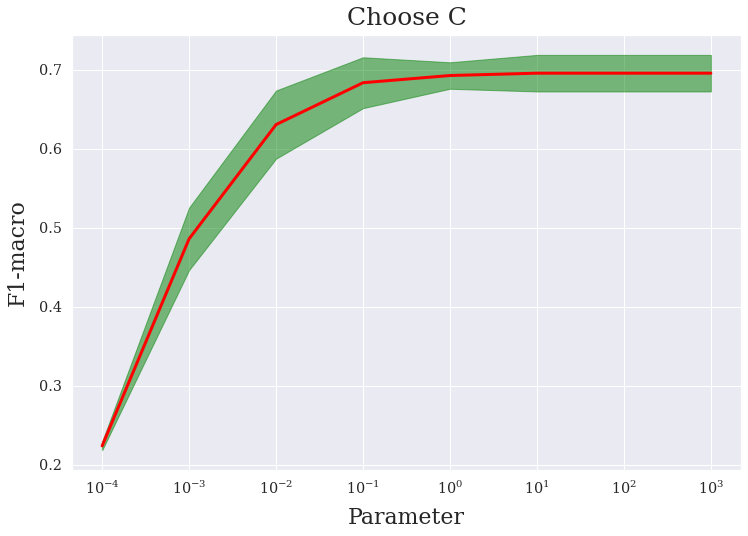

Best params: {'C': 10.0}


In [33]:
best_params = search_and_draw(X_train_scaled_pca, y_train, 
                              model, parameters, 
                              param_scale="log")

print(f"Best params: {best_params}")

In [34]:
BEST_C = best_params["C"]

In [35]:
model = LogisticRegression(
    multi_class='multinomial', 
    solver='saga',
    tol=1e-3,
    C=BEST_C,
    random_state=RANDOM_STATE
)

model.fit(X_train_scaled_pca, y_train)
y_train_predicted = model.predict(X_train_scaled_pca)
y_test_predicted = model.predict(X_test_scaled_pca)

In [36]:
calculate_metrics(y_train, y_train_predicted, y_test, y_test_predicted)

,accuracy,f1-macro
train,0.708561,0.707670
test,0.723906,0.718113


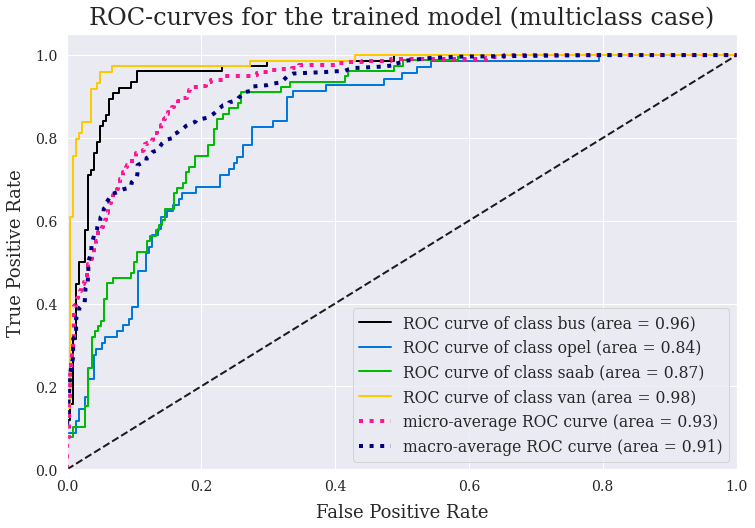

In [37]:
plot_roc_curves(y_test, model.predict_proba(X_test_scaled_pca))

#### 1.5. Decision tree

* Теперь построим дерево решений на тех же данных. Найдем оптимальную глубину дерева (`max_depth`) с помощью кросс-валидации.

* Измерим качество модели, используя те же показатели, которые мы использовали выше.

Fitting 4 folds for each of 29 candidates, totalling 116 fits


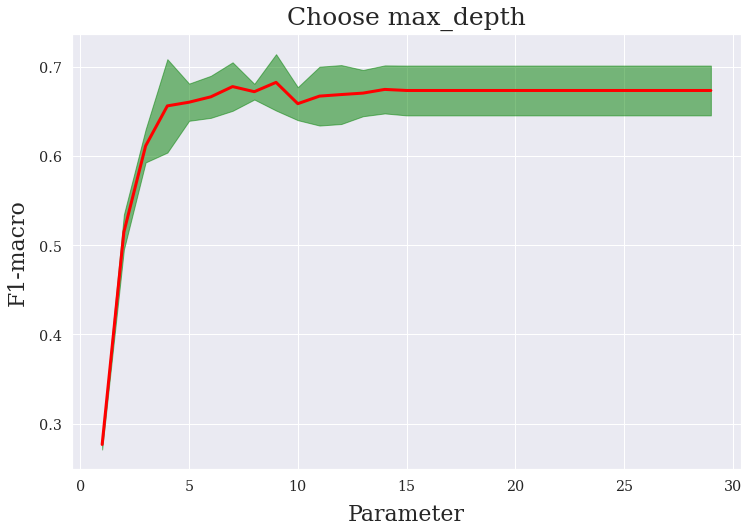

Best params: {'max_depth': 9}


,accuracy,f1-macro
train,0.941712,0.942419
test,0.696970,0.689536


Fitting 4 folds for each of 29 candidates, totalling 116 fits


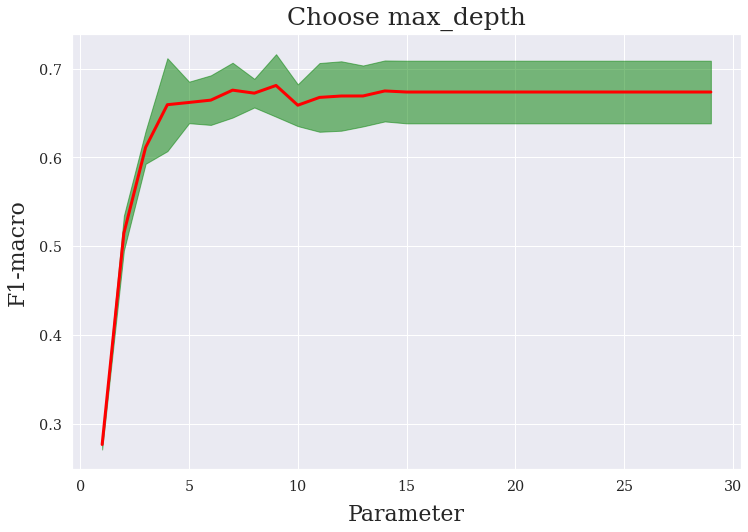

Best params: {'max_depth': 9}


,accuracy,f1-macro
train,0.941712,0.942419
test,0.696970,0.689536


Fitting 4 folds for each of 29 candidates, totalling 116 fits


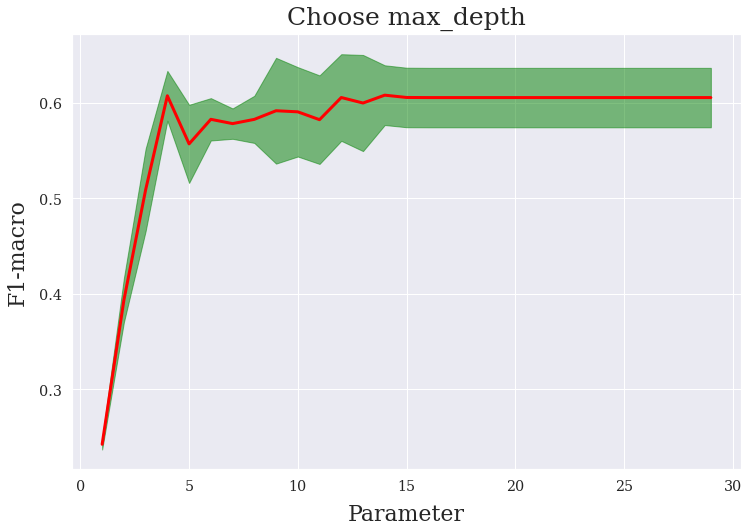

Best params: {'max_depth': 14}


,accuracy,f1-macro
train,0.990893,0.991134
test,0.646465,0.642303


In [38]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(random_state=RANDOM_STATE)
parameters = {"max_depth": np.arange(1, 30)}

BEST_MAX_DEPTH = 0 # used in the future

train_test_data = [(X_train, X_test), 
                   (X_train_scaled, X_test_scaled), 
                   (X_train_scaled_pca, X_test_scaled_pca)]
for train_X, test_X in train_test_data:
    best_params = search_and_draw(train_X, y_train, model, parameters)
    BEST_MAX_DEPTH = best_params["max_depth"]
    print(f"Best params: {best_params}")

    model = DecisionTreeClassifier(max_depth=BEST_MAX_DEPTH, random_state=RANDOM_STATE)
    model.fit(train_X, y_train)
    y_train_predicted = model.predict(train_X)
    y_test_predicted = model.predict(test_X)
    
    display(calculate_metrics(y_train, y_train_predicted, y_test, y_test_predicted))

**Вывод:** 

Дерево сильно переобучилось.

#### 1.6. Bagging.

Здесь начинается часть построения ансамблевых моделей.

Сначала мы будем использовать подход __Bagging__. Создадим ансамбль из $N$ алгоритмов, варьирующих N от $N_{min}=2$ до $N_{max}=100$ (с шагом 5).

Построим два ансамбля: логистических регрессий и деревьев решений.

* Комментарий: каждый ансамбль будет построен из моделей одного семейства.*

* Воспользуемся подходящим классом из sklearn.*

* Построим графики метрик качества `f1` и `accuracy` в зависимости от размера ансамбля.

* Кратко проанализируем результаты. Выберем оптимальное количество алгоритмов. Объясним свой ответ.

In [39]:
def plot_learning_curve(fig, ax, train_subsets_sizes, scores, 
                        metric_names, colors, suptitle, caption,
                        xlabel, ylabel="metric"):
    """
    Plot of accuracy and f1 scores on test part, varying the train dataset size.
    So the X-axis and Y-axis will be score - dataset size & metric respectively
    ---------------------------------------------------------------------------
    @param fig — matplotlib figure
    @param ax — matplotlib axis — axis associated with fig
    @param train_subsets_sizes - list(int) - varied sizes of training datasets
    @param scores - dict(str, dict(str, list(int))) - scores of model on test
    @param metric_names — list(str) — names of quality metrics
    @param colors — dict(str, str) — colors for each model
    @param suptitle — str — title for fig
    @param caption — str — caption for fig
    @param xlabel - str - x axis description
    @param ylabel - str - y axis description
    ---------------------------------------------------------------------------
    """
    fig.subplots_adjust(bottom=0.2, top=0.85, wspace=0.1)
    fig.suptitle(suptitle, fontsize=25)
    fig.align_labels(axs=ax)
    fig.text(0.5, 0.025, caption, wrap=True, horizontalalignment='center', fontsize=24)

    for i, metric_name in enumerate(metric_names):
        ax[i].set_title(f"{metric_name} in Test sample", fontsize=22, pad=10)
        ax[i].set_xlabel(xlabel, fontsize=22, labelpad=10)
        ax[i].set_ylabel(ylabel, fontsize=22, labelpad=10)
        ax[i].set_xticks(train_subsets_sizes)
        ax[i].ticklabel_format(style='sci', axis='y')
    ax[0].yaxis.set_label_position("left")
    ax[1].yaxis.set_label_position("right")
    ax[1].yaxis.tick_right()

    for model_name, model_scores in scores.items():
        for i, (metric, scores) in enumerate(model_scores.items()):
            print(model_name, i, metric, scores)
            ax[i].plot(train_subsets_sizes, scores, 
                    label=model_name, 
                    color=colors[model_name],
                    marker="*", 
                    linestyle="-.", 
                    linewidth=2, 
                    markerfacecolor="gold",
                    markersize=16)
            
            legend = ax[i].legend(loc="bottom right", fontsize=15)
            frame = legend.get_frame()
            frame.set_facecolor("white")
            frame.set_edgecolor("black")

    plt.show()

In [40]:
ensemble_sizes = np.arange(2, 100 + 1, 5)
models = dict(
    LogisticRegression=LogisticRegression(C=BEST_C, multi_class='multinomial', 
                                          random_state=RANDOM_STATE, 
                                          solver='saga', tol=1e-3), 
    DecisionTree=DecisionTreeClassifier(max_depth=BEST_MAX_DEPTH, 
                                        random_state=RANDOM_STATE)
)

In [41]:
from collections import defaultdict
from sklearn.ensemble import BaggingClassifier


global_scores = defaultdict(lambda: defaultdict(list))

for model_name, model in tqdm(models.items(), desc="outer"):
    for size in tqdm(ensemble_sizes, desc="inner"):
        clf = BaggingClassifier(base_estimator=model, 
                                n_estimators=size, 
                                random_state=RANDOM_STATE)
        clf.fit(X_train_scaled_pca, y_train)
        y_train_predicted = clf.predict(X_train_scaled_pca)
        y_test_predicted = clf.predict(X_test_scaled_pca)

        global_scores[model_name]["f1-macro"].append(f1_score(y_test, y_test_predicted, average="macro"))
        global_scores[model_name]["accuracy"].append(accuracy_score(y_test, y_test_predicted))

outer:   0%|          | 0/2 [00:00<?, ?it/s]

inner:   0%|          | 0/20 [00:00<?, ?it/s]

inner:   0%|          | 0/20 [00:00<?, ?it/s]

LogisticRegression 0 f1-macro [0.700305852772958, 0.7004861944720351, 0.7123503498218244, 0.6963772335110787, 0.7028176784394707, 0.7037529079863176, 0.7140594080249252, 0.7145588836643785, 0.7145588836643785, 0.7145588836643785, 0.7141730443834626, 0.7177503117309688, 0.7177503117309688, 0.7213042831095788, 0.7213042831095788, 0.7213042831095788, 0.7181128550429885, 0.7181128550429885, 0.7213042831095788, 0.7216445834866888]
LogisticRegression 1 accuracy [0.7104377104377104, 0.7070707070707071, 0.7205387205387206, 0.7037037037037037, 0.7104377104377104, 0.7104377104377104, 0.7205387205387206, 0.7205387205387206, 0.7205387205387206, 0.7205387205387206, 0.7205387205387206, 0.7239057239057239, 0.7239057239057239, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7239057239057239, 0.7239057239057239, 0.7272727272727273, 0.7272727272727273]
DecisionTree 0 f1-macro [0.5798770265010293, 0.6768377666987971, 0.6820268720515027, 0.6835612982164706, 0.6831444487375823, 0.697881567013

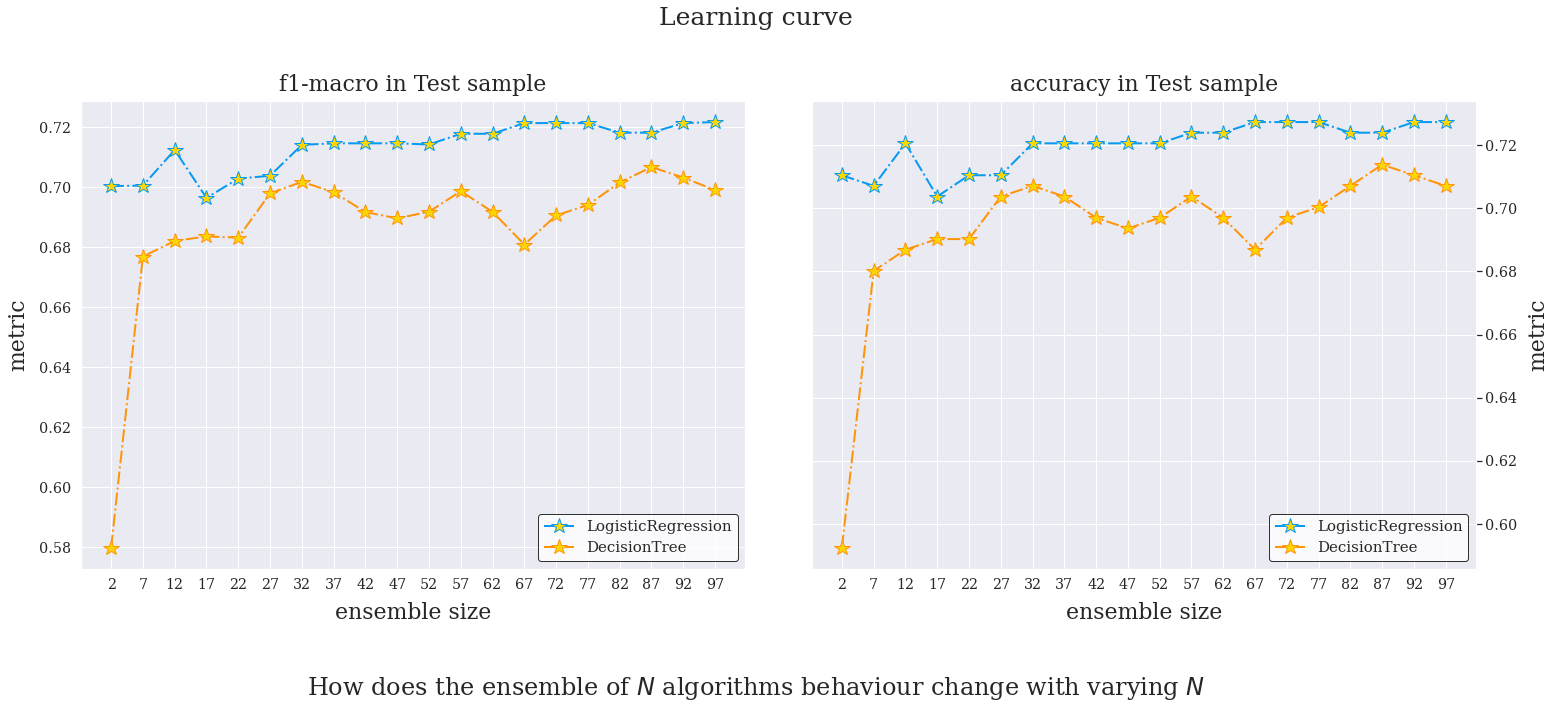

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
model_names = list(models.keys())
metric_names = list(list(global_scores.values())[0].keys())

plot_learning_curve(fig, ax, ensemble_sizes, global_scores,
                    metric_names=metric_names,
                    colors={model_names[0]: "xkcd:azure",
                            model_names[1]: "xkcd:tangerine"},
                    suptitle="Learning curve",
                    caption=r"How does the ensemble of $N$ algorithms "
                             "behaviour change with varying $N$",
                    xlabel="ensemble size")

__Вывод:__

Как видно по графикам, в основном качество ансамблей из логистических регрессий растет с увеличением числа алгоритмов, а ансамбли из решающих деревьев ведут себя скачкообразно. 

Детально:

* Ансамбли из логистических регрессий показывают качество выше, чем деревья. Скорее всего данные хорошо линейно разделимы (убедимся позже в этой гипотезе).
* Ансамбли из решающих деревьев начинают показывать свои лучшие результаты уже на небольшом наборе алгоритмов (27, 32).
* Странно, что при ensemble_size=62, 67, 72 работают плохо. Пока не могу понять почему так.

#### 1.7. Random Forest
Теперь мы будем работать со случайным лесом (его реализацией из `sklearn`).

* Построим графики метрик качества `f1` и `accuracy` в зависимости от количества деревьев в случайном лесу.

* Кратко объясним результаты.

Fitting 4 folds for each of 48 candidates, totalling 192 fits


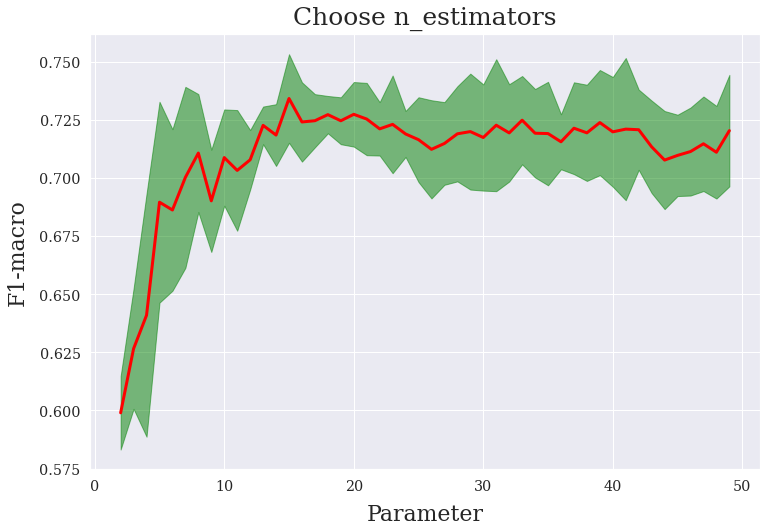

Best params: {'n_estimators': 15}


,accuracy,f1-macro
train,0.998179,0.998246
test,0.754209,0.743704


Fitting 4 folds for each of 48 candidates, totalling 192 fits


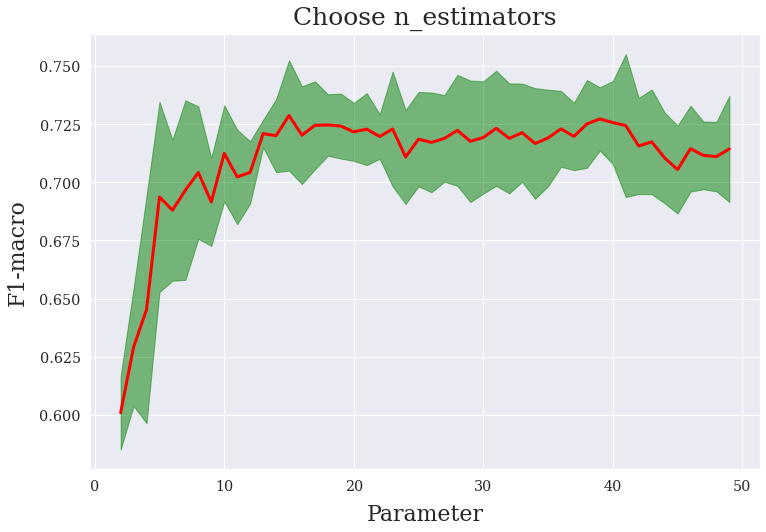

Best params: {'n_estimators': 15}


,accuracy,f1-macro
train,1.000000,1.000000
test,0.757576,0.747658


Fitting 4 folds for each of 48 candidates, totalling 192 fits


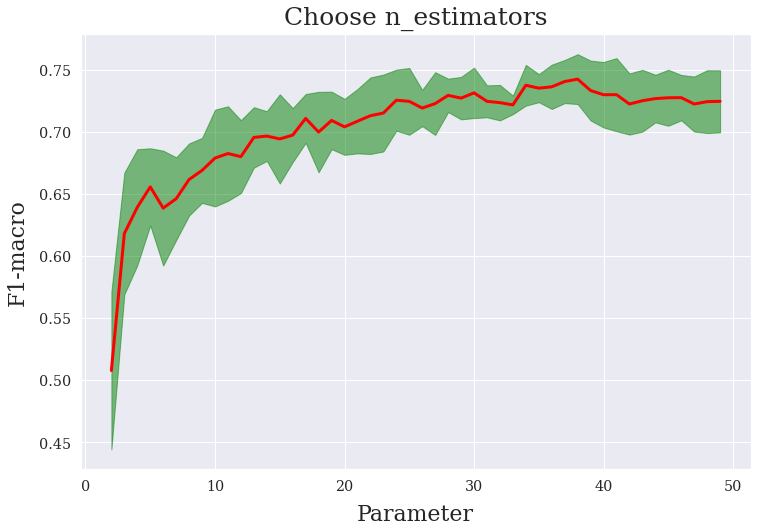

Best params: {'n_estimators': 38}


,accuracy,f1-macro
train,1.00000,1.000000
test,0.69697,0.691489


In [43]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=RANDOM_STATE)
parameters = {"n_estimators": np.arange(2, 50)}

BEST_N_ESTIMATORS = 0 # used in the future

train_test_data = [(X_train, X_test), 
                   (X_train_scaled, X_test_scaled), 
                   (X_train_scaled_pca, X_test_scaled_pca)]
for train_X, test_X in train_test_data:
    best_params = search_and_draw(train_X, y_train, model, parameters)
    BEST_N_ESTIMATORS = best_params["n_estimators"]
    print(f"Best params: {best_params}")
    
    model = RandomForestClassifier(n_estimators=BEST_N_ESTIMATORS,random_state=RANDOM_STATE)
    model.fit(train_X, y_train)
    y_train_predicted = model.predict(train_X)
    y_test_predicted = model.predict(test_X)
    
    display(calculate_metrics(y_train, y_train_predicted, y_test, y_test_predicted))

Decision Tree и Random Forest выдали скор меньше, чем у логрессии. Скорее всего это потому, что данные линейно разделимы.

#### 1.8. Learning curve

Наша цель - оценить, как меняется поведение модели с увеличением размера набора данных `train`.

* Разделим обучающие данные на 10 равных (почти) частей. Затем обучим модели (Логистическая регрессия, Дерево решений, Случайный лес) с оптимальными гиперпараметрами, которые мы выбрали для 1 части, 2 частей (объединенных, поэтому размер `train` увеличивается в 2 раза), 3 части и так далее.

* Построим графики метрик качества `accuracy` и `f1` в части `test`, изменяя размер набора данных `train` (таким образом, оси будут соответствовать размеру набора данных и метрикам качества).

* Проанализируем окончательный результат.

In [44]:
models = dict(
    LogisticRegression=LogisticRegression(C=BEST_C, multi_class='multinomial', 
                                          random_state=RANDOM_STATE, 
                                          solver='saga', tol=1e-3), 
    DecisionTree=DecisionTreeClassifier(max_depth=BEST_MAX_DEPTH, 
                                        random_state=RANDOM_STATE), 
    RandomForest=RandomForestClassifier(n_estimators=BEST_N_ESTIMATORS, 
                                        random_state=RANDOM_STATE)
)

In [45]:
N_PARTS = 10
part_size = round(X_train_scaled_pca.shape[0] / N_PARTS)
part_sizes = list(range(
    part_size, X_train_scaled_pca.shape[0] + part_size, part_size
))
train_test_subsets = tuple(zip(
    [X_train_scaled_pca[0:size] for size in part_sizes],
    [y_train[0:size] for size in part_sizes],
    [X_test_scaled_pca] * N_PARTS,
    [y_test] * N_PARTS
))

In [46]:
global_scores = defaultdict(lambda: defaultdict(list))

for model_name, model in models.items():
    for X_train_subset, y_train_subset, X_test, y_test in train_test_subsets:
        model.fit(X_train_subset, y_train_subset)
        y_train_predicted = model.predict(X_train_subset)
        y_test_predicted = model.predict(X_test)
        
        global_scores[model_name]["f1-macro"].append(f1_score(y_test, y_test_predicted, average="macro"))
        global_scores[model_name]["accuracy"].append(accuracy_score(y_test, y_test_predicted))

In [47]:
global_scores

defaultdict(<function __main__.<lambda>>,
            {'DecisionTree': defaultdict(list,
                         {'accuracy': [0.4444444444444444,
                           0.5185185185185185,
                           0.5656565656565656,
                           0.5757575757575758,
                           0.6195286195286195,
                           0.5555555555555556,
                           0.622895622895623,
                           0.622895622895623,
                           0.6734006734006734,
                           0.6464646464646465],
                          'f1-macro': [0.42897782518674427,
                           0.5284758697070381,
                           0.5665477178413674,
                           0.578085027668233,
                           0.6177568267148477,
                           0.5612430530788172,
                           0.6212298622848107,
                           0.6211879171310104,
                           0.6670583873631

LogisticRegression 0 f1-macro [0.5293684812050629, 0.6452683853748332, 0.650484855339273, 0.7013674197257997, 0.6863270670705903, 0.6866638527996107, 0.7123331671985528, 0.7103214922332569, 0.7141423820990385, 0.7181128550429885]
LogisticRegression 1 accuracy [0.531986531986532, 0.6498316498316499, 0.6565656565656566, 0.7104377104377104, 0.696969696969697, 0.696969696969697, 0.7205387205387206, 0.7171717171717171, 0.7205387205387206, 0.7239057239057239]
DecisionTree 0 f1-macro [0.42897782518674427, 0.5284758697070381, 0.5665477178413674, 0.578085027668233, 0.6177568267148477, 0.5612430530788172, 0.6212298622848107, 0.6211879171310104, 0.6670583873631304, 0.642303328855053]
DecisionTree 1 accuracy [0.4444444444444444, 0.5185185185185185, 0.5656565656565656, 0.5757575757575758, 0.6195286195286195, 0.5555555555555556, 0.622895622895623, 0.622895622895623, 0.6734006734006734, 0.6464646464646465]
RandomForest 0 f1-macro [0.48439782046961016, 0.6224729969601999, 0.6968758353381449, 0.6876355

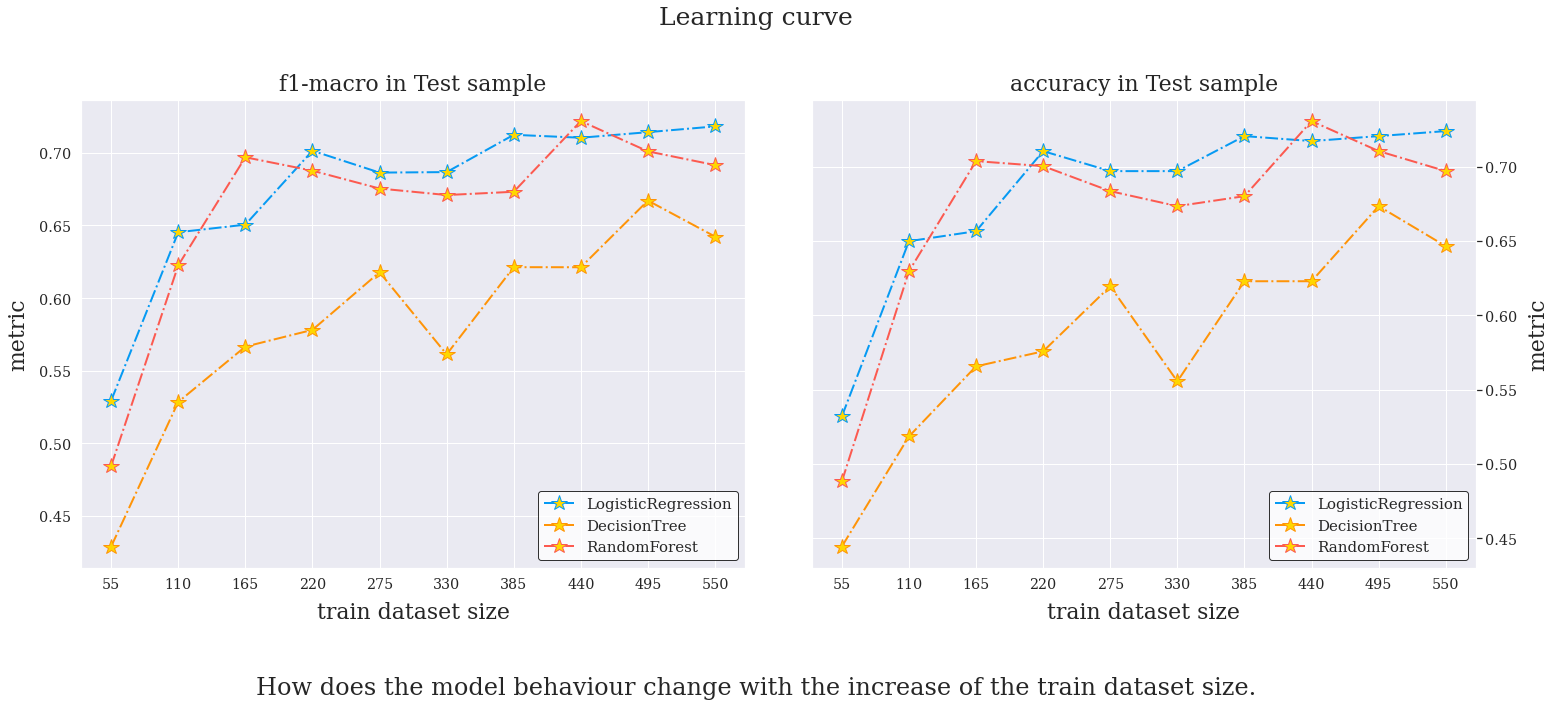

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
model_names = list(models.keys())
metric_names = list(list(global_scores.values())[0].keys())

plot_learning_curve(fig, ax, part_sizes, global_scores,
                    metric_names=metric_names,
                    colors={model_names[0]: "xkcd:azure",
                            model_names[1]: "xkcd:tangerine",
                            model_names[2]: "xkcd:coral"},
                    suptitle="Learning curve",
                    caption="How does the model behaviour change with "
                            "the increase of the train dataset size.",
                    xlabel="train dataset size")
del model_names
del metric_names